<a href="https://colab.research.google.com/github/andrii4k-kit/pytorch-learning/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Computer Vision


In [89]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


In [90]:
import os

try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend "numpy<2.0"

    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 97.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.36.3 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is i

### FashionMNIST DataSet

In [91]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True, #
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [92]:
len(test_data), len(train_data)

(10000, 60000)

In [93]:
image, label = train_data[9]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6431, 0.1961,
           0.0000, 0.0275, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0039, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0039,
           0.0000, 0.0000, 0.0196, 0.0000, 

In [94]:
image.shape

torch.Size([1, 28, 28])

In [95]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Visualizing Data

Image shape: torch.Size([1, 28, 28])


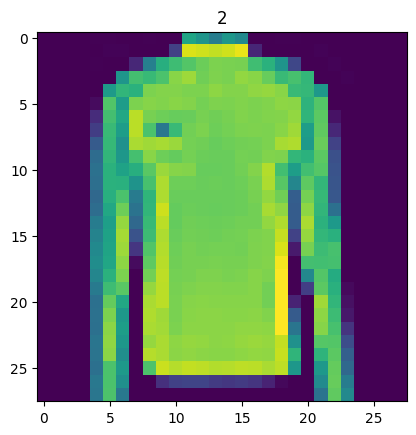

In [96]:
import matplotlib.pyplot as plt
image, label = train_data[1002]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

Text(0.5, 1.0, 'Pullover')

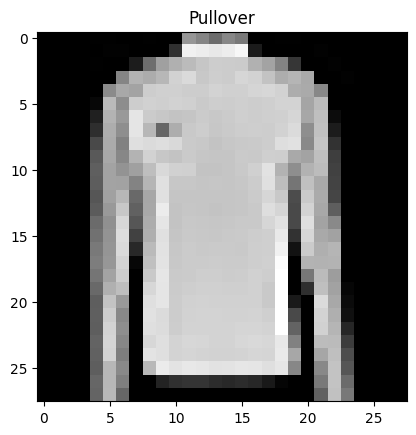

In [97]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

In [98]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

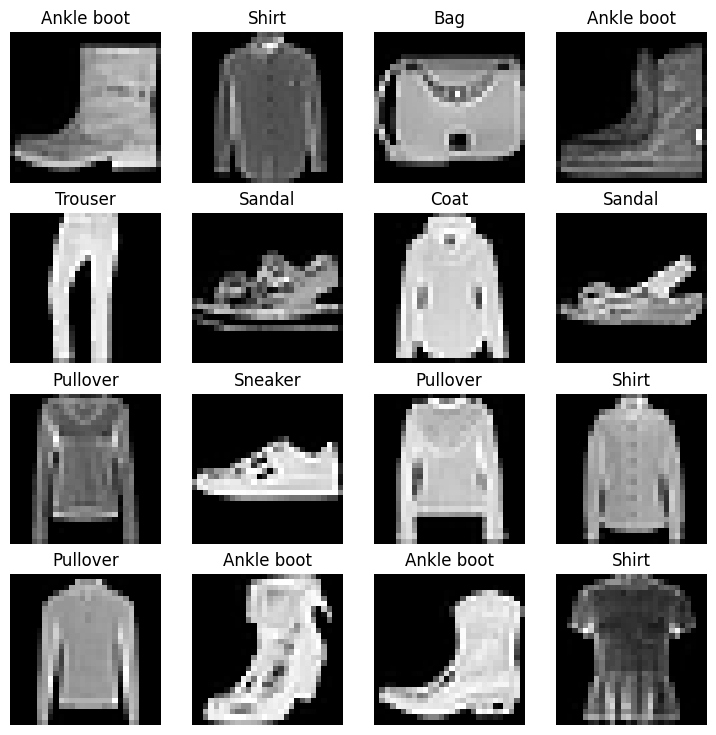

In [99]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [100]:
from torch.utils.data import DataLoader
BATCH_SIZE = 64
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79326bc3e510>, <torch.utils.data.dataloader.DataLoader object at 0x79320e1499d0>)
Length of train dataloader: 938 batches of 64
Length of test dataloader: 157 batches of 64


In [101]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([64, 1, 28, 28])

In [102]:
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_features_batch.shape, test_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

## Building a Model 0

In [103]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [104]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units), #
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [105]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [106]:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py already exists, skipping download


In [107]:
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [108]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [109]:
# progress bar
from tqdm.auto import tqdm


torch.manual_seed(42)
train_time_start_on_cpu = timer()


epochs = 3

# training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)

        train_loss += loss # accumulatively add up the loss per epoch

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 200 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)


    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.63283 | Test loss: 0.53672, Test acc: 80.99%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.48113 | Test loss: 0.54580, Test acc: 80.80%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45612 | Test loss: 0.52498, Test acc: 82.54%

Train time on cpu: 34.422 seconds


In [110]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    loss, acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5230569839477539,
 'model_acc': 82.66321656050955}

## device agnostic-code

## Model 1: Building a better model with non-linearity

In [111]:
# model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device

device(type='cuda', index=0)

In [112]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Functions for training & testing loop


In [113]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)

  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)

    train_loss += loss.item() # accumulatively add up the loss per epoch

    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
      for X, y in data_loader:
          # Send data to GPU
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred = model(X)

          # 2. Calculate loss and accuracy
          test_loss += loss_fn(test_pred, y).item()
          test_acc += accuracy_fn(y_true=y,
              y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
          )

      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [114]:
torch.manual_seed(42)


from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.12774 | Train accuracy: 60.64%
Test loss: 0.95345 | Test accuracy: 65.15%

Epoch: 1
---------
Train loss: 0.92884 | Train accuracy: 65.99%
Test loss: 0.94344 | Test accuracy: 65.76%

Epoch: 2
---------
Train loss: 0.89531 | Train accuracy: 66.81%
Test loss: 0.94328 | Test accuracy: 65.57%

Train time on cuda: 25.104 seconds


In [115]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9438399076461792,
 'model_acc': 65.53542993630573}

## Building a CNN Model

In [116]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
            x = self.block_1(x)
            #print(x.shape)
            x = self.block_2(x)
            #print(x.shape)
            x = self.classifier(x)
            #print(x.shape)
            return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [117]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

#### Training/Testing CNN

In [118]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.80962 | Train accuracy: 70.44%
Test loss: 0.47591 | Test accuracy: 83.31%

Epoch: 1
---------
Train loss: 0.40004 | Train accuracy: 85.66%
Test loss: 0.43795 | Test accuracy: 84.29%

Epoch: 2
---------
Train loss: 0.35478 | Train accuracy: 87.27%
Test loss: 0.38245 | Test accuracy: 86.32%

Train time on cuda: 27.532 seconds


In [119]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.38101455569267273,
 'model_acc': 86.34554140127389}

#### Comparing trained models

In [120]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.523057,82.663217
1,FashionMNISTModelV1,0.943840,65.535430
2,FashionMNISTModelV2,0.381015,86.345541


In [121]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.523057,82.663217,34.421908
1,FashionMNISTModelV1,0.943840,65.535430,25.103687
2,FashionMNISTModelV2,0.381015,86.345541,27.531701


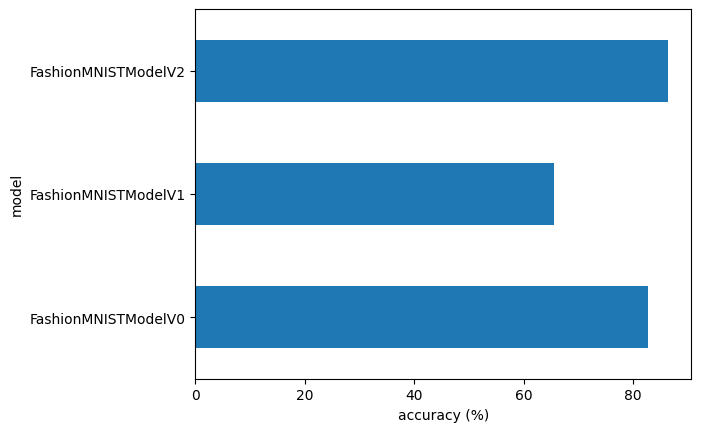

In [122]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### Evaluating random predictions

In [123]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)


In [124]:
import random
#random.seed(43)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (Shirt)


In [125]:
pred_probs= make_predictions(model=model_2,
                             data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 7, 0, 8, 8, 0, 4, 8, 8])

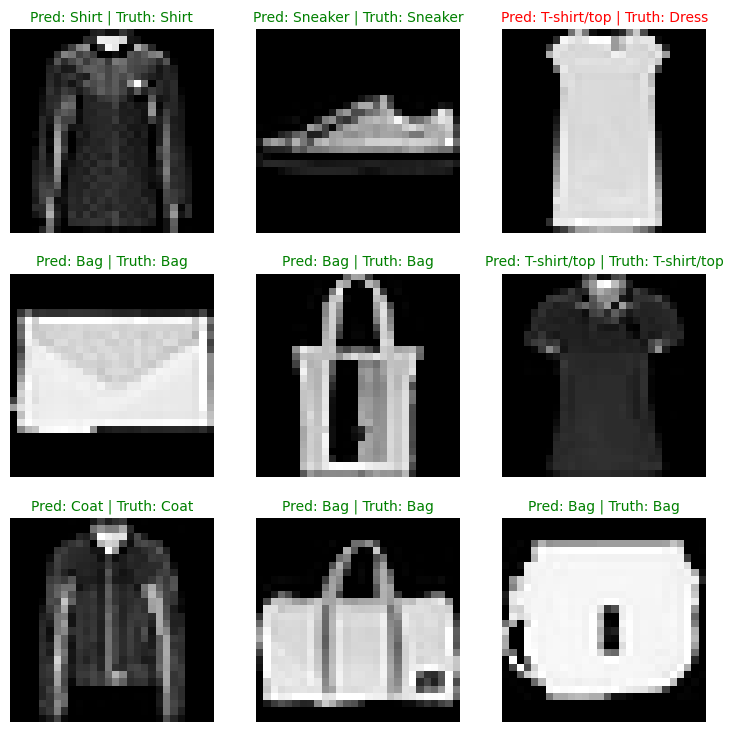

In [126]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):

  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


### confusion matrix

In [127]:

from tqdm.auto import tqdm

y_preds = []
y_labels = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):

    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())
    y_labels.append(y.cpu())

y_pred_tensor = torch.cat(y_preds)
y_label_tensor = torch.cat(y_labels)

Making predictions:   0%|          | 0/157 [00:00<?, ?it/s]

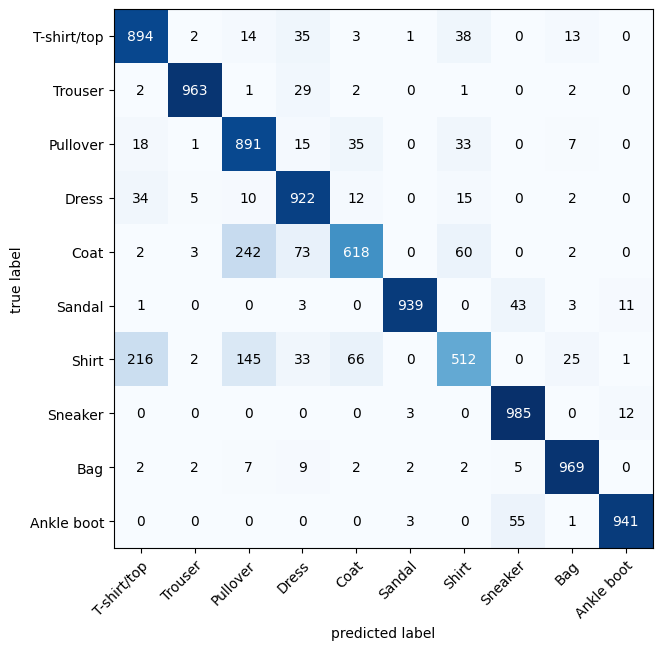

In [128]:


from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_label_tensor)


fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

###Model Saving

In [129]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME_0 = "model_0"
MODEL_NAME_1 = "model_1"
MODEL_NAME_2 = "model_2"

MODEL_SAVE_PATH_0 = MODEL_PATH / MODEL_NAME_0
MODEL_SAVE_PATH_1 = MODEL_PATH / MODEL_NAME_1
MODEL_SAVE_PATH_2 = MODEL_PATH / MODEL_NAME_2

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH_0)

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH_1)

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH_2)


# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!


In [130]:
# Check for GPU
!nvidia-smi

Fri Jan 16 17:03:27 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             34W /   70W |     188MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [131]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.9.0+cu126


'cuda'

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [132]:
import torchvision
from torchvision import datasets, transforms
from torch import nn

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None,
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None,
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

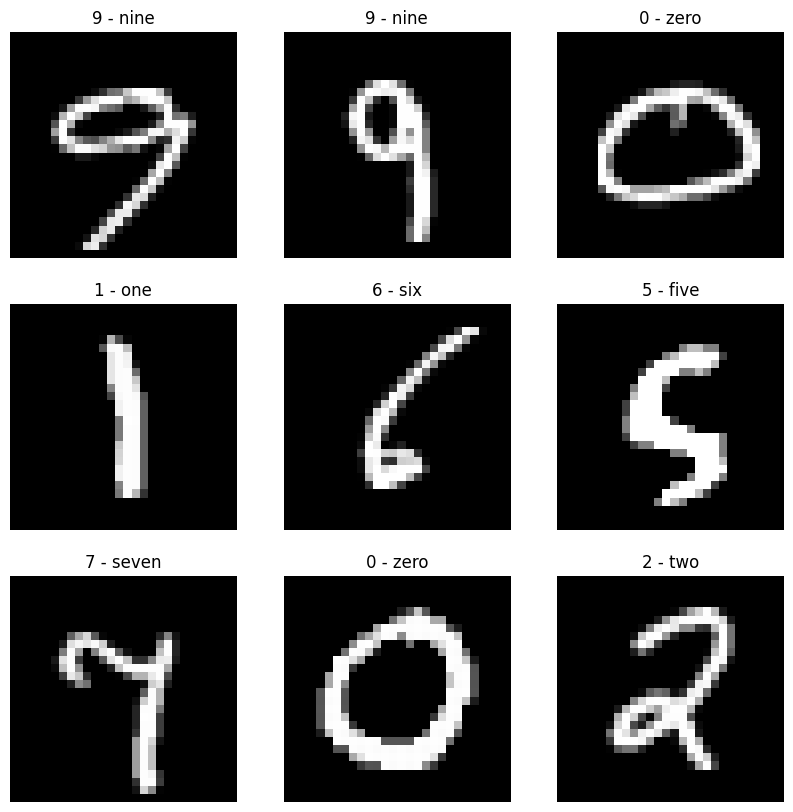

In [133]:
class_names = train_data.classes


fig = plt.figure(figsize=(10, 10))

rows, cols = 3, 3
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [134]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

In [135]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [136]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_double_conv_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_double_conv_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_tripple_conv = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 3 * 3, # in the lsat pooling the image is 3x3 and there are then 10 images with 3x3
                  out_features=output_shape)
    )
  def forward(self, x: torch.Tensor):
    #print(x.shape)
    x = self.block_double_conv_1(x)
    #print(x.shape)
    x = self.block_double_conv_2(x)
    #print(x.shape)
    x = self.block_tripple_conv(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)

    return x




In [137]:
model_mnist_gpu = TinyVGG(input_shape=1, hidden_units=10, output_shape=10).to(device)
model_mnist_gpu

TinyVGG(
  (block_double_conv_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_double_conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_tripple_conv): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ce

In [138]:
model_mnist = TinyVGG(input_shape=1, hidden_units=10, output_shape=10).to(device)
model_mnist

TinyVGG(
  (block_double_conv_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_double_conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_tripple_conv): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ce

In [139]:
img, label = train_data[156]

img_batch = img.unsqueeze(dim=0)

model_mnist.eval()
with torch.inference_mode():
  pred = model_mnist(img_batch.to(device))

pred_label = pred.argmax(dim=1).item()
pred_label, label

(3, 0)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [140]:
device = "cpu"

from tqdm.auto import tqdm

model_mnist = model_mnist.to(device)
optimizer = torch.optim.Adam(params=model_mnist.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_mnist_cpu = timer()

epochs = 1

for epoch in tqdm(range(epochs)):
  model_mnist.train()
  print(f"Epoch: {epoch}\n---------")

  ### Training
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model_mnist(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 200 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_mnist.eval()
  with torch.inference_mode():
      for X, y in test_dataloader:
          X, y = X.to(device), y.to(device)
          test_pred = model_mnist(X)

          test_loss += loss_fn(test_pred, y)

          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      test_loss /= len(test_dataloader)

      test_acc /= len(test_dataloader)


  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
train_time_cpu = print_train_time(start=train_time_start_model_mnist_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_mnist.parameters()).device))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples

Train loss: 0.30834 | Test loss: 0.12294, Test acc: 96.11%

Train time on cpu: 50.962 seconds


In [141]:
from tqdm.auto import tqdm

model_mnist_gpu = model_mnist_gpu.to(device)
optimizer = torch.optim.SGD(params=model_mnist_gpu.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_mnist_gpu = timer()

epochs = 1

for epoch in tqdm(range(epochs)):
  model_mnist_gpu.train()
  print(f"Epoch: {epoch}\n---------")

  ### Training
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model_mnist_gpu(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 200 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)#
  train_acc /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_mnist_gpu.eval()
  with torch.inference_mode():
      for X, y in test_dataloader:
          X, y = X.to(device), y.to(device)
          test_pred = model_mnist_gpu(X)

          test_loss += loss_fn(test_pred, y)

          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      test_loss /= len(test_dataloader)

      test_acc /= len(test_dataloader)


  print(f"\nTrain loss: {train_loss:.5f}, Ttrain acc: {train_acc:.2f}%\n | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_gpu = timer()
train_time_gpu = print_train_time(start=train_time_start_model_mnist_gpu,
                                           end=train_time_end_on_gpu,
                                           device=str(next(model_mnist_gpu.parameters()).device))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples

Train loss: 2.30497, Ttrain acc: 9.93%
 | Test loss: 2.30361, Test acc: 10.31%

Train time on cpu: 49.713 seconds


In [142]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    loss, acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [143]:
model_cpu = eval_model(model=model_mnist, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn, device="cpu"
)

model_gpu = eval_model(model=model_mnist_gpu, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn, device="cuda"
)

In [144]:
model_cpu, model_gpu

({'model_name': 'TinyVGG',
  'model_loss': 0.12321718037128448,
  'model_acc': 96.09624600638978},
 {'model_name': 'TinyVGG',
  'model_loss': 2.3036139011383057,
  'model_acc': 10.313498402555911})

In [145]:
import pandas as pd
compare_results = pd.DataFrame([model_cpu, model_gpu])
compare_results

,model_name,model_loss,model_acc
0,TinyVGG,0.123217,96.096246
1,TinyVGG,2.303614,10.313498


In [146]:
compare_results["training_time"] = [train_time_cpu, train_time_gpu]
compare_results

,model_name,model_loss,model_acc,training_time
0,TinyVGG,0.123217,96.096246,50.962086
1,TinyVGG,2.303614,10.313498,49.713268


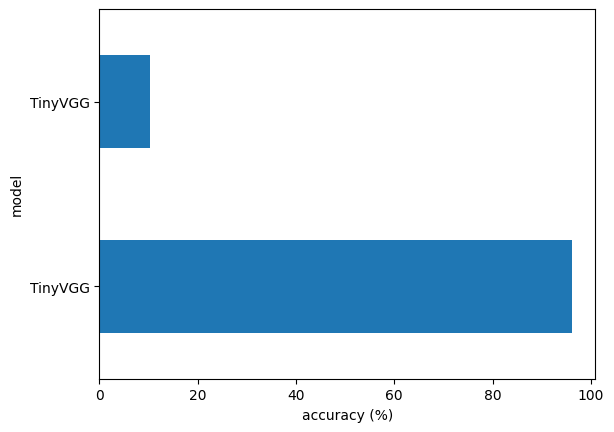

In [147]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [148]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [149]:
import random
#random.seed(43)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [154]:
pred_probs= make_predictions(model=model_mnist,
                             data=test_samples,
                             device="cuda")
pred_classes = pred_probs.argmax(dim=1)

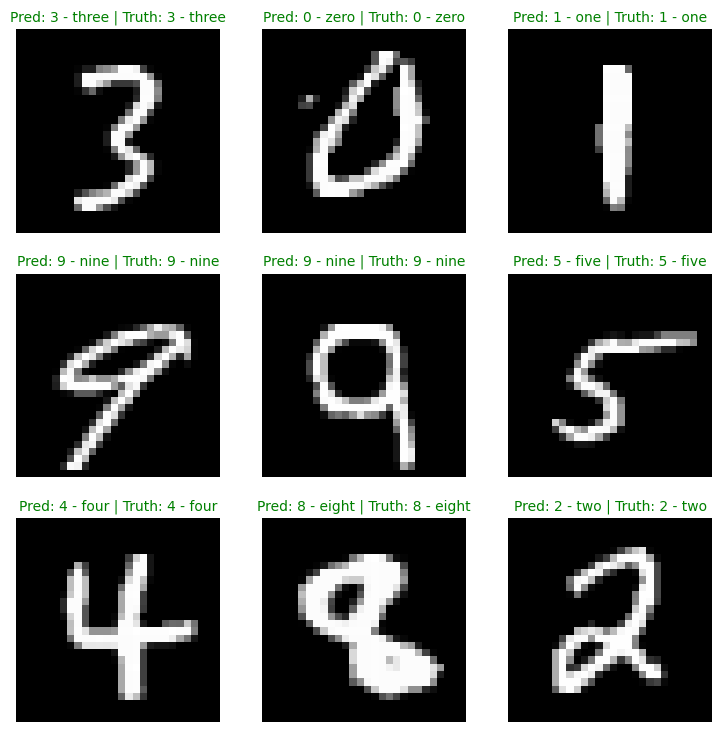

In [155]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):

  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]


  truth_label = class_names[test_labels[i]]


  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [152]:
from tqdm.auto import tqdm


y_preds = []
y_labels = []

model_mnist.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Sammle Vorhersagen"):

        X, y = X.to(device), y.to(device)

        y_logit = model_mnist(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        y_preds.append(y_pred.cpu())
        y_labels.append(y.cpu())


y_pred_tensor = torch.cat(y_preds)
y_label_tensor = torch.cat(y_labels)


Sammle Vorhersagen:   0%|          | 0/313 [00:00<?, ?it/s]

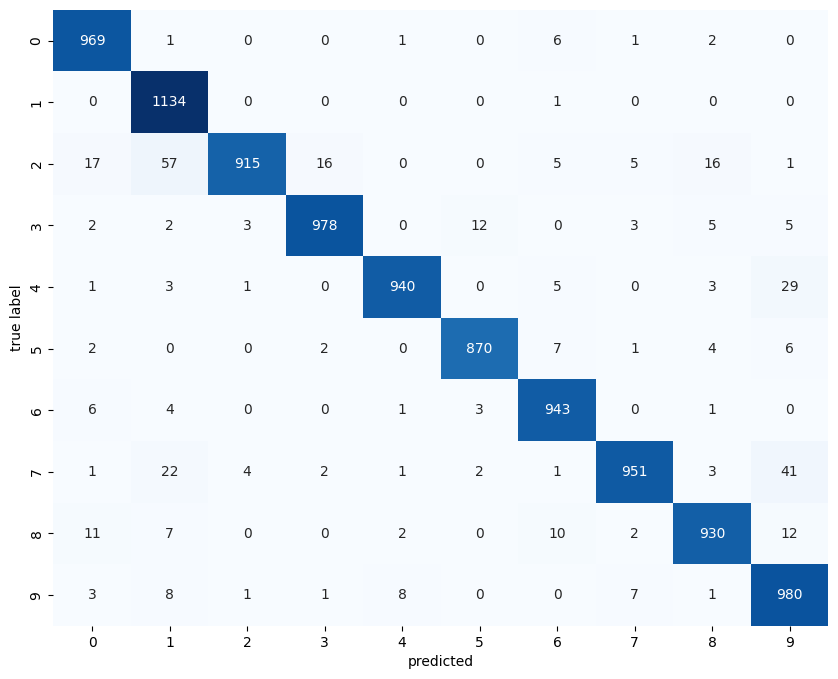

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_true=y_label_tensor.numpy(),
                            y_pred=y_pred_tensor.numpy())

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat,
            annot=True, #
            fmt='d',
            cmap='Blues',
            cbar=False)

plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()